# Networks 

In this lab you'll do some exercises to familiarise yourself with network properties and concepts.

In [1]:
%matplotlib inline

In [2]:
import itertools
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt

**Exercise 1(a):**

This exercise is to do by hand, on paper. Given the undirected graph drawn below, write down the adjacency matrix.

<img src="img/small_graph_undirected.png">

**Exercise 1(b):**

This exercise is to do by hand, on paper. Given the directed graph drawn below, write down the adjacency matrix.

<img src="img/small_graph_directed.png">

**Exercise 2:**

Create the above graphs in networkx (or just in your own data structure if you prefer, but this will make the exercise harder). Draw them with the below code to make sure your graphs have the same structure as the diagrams above. Code is given to compute the adjacency matrix with networkx, to check your own adjacency matrices from Exercise 1.

In [3]:
# Define as a networkx object and add nodes/edges
graphA = nx.Graph()
graphA.add_edge('A','B')
graphA.add_edge('C','B')
graphA.add_edge('A','C')
graphA.add_edge('C','D')

In [4]:
# Define as a networkx object and add nodes/edges
graphB = nx.DiGraph()
graphB.add_edge('A','B')
graphB.add_edge('C','B')
graphB.add_edge('A','C')
graphB.add_edge('C','D')
graphB.add_edge('E','C')

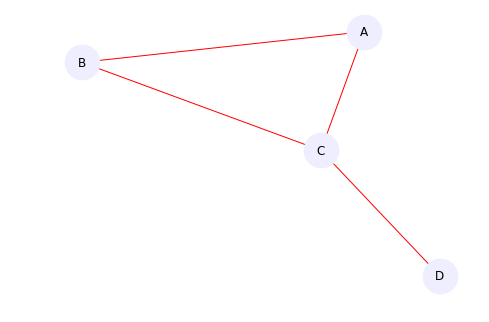

In [5]:
nx.draw_spring(graphA, with_labels=True, node_size=1200, node_color='#eeeeff', edge_color='red')

In [6]:
nx.adjacency_matrix(graphA)

<4x4 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [7]:
print(nx.adjacency_matrix(graphA))

  (0, 1)	1
  (0, 2)	1
  (1, 0)	1
  (1, 2)	1
  (2, 0)	1
  (2, 1)	1
  (2, 3)	1
  (3, 2)	1


In [8]:
print(graphA.nodes())
nx.to_numpy_matrix(graphA)

['A', 'B', 'C', 'D']


matrix([[ 0.,  1.,  1.,  0.],
        [ 1.,  0.,  1.,  0.],
        [ 1.,  1.,  0.,  1.],
        [ 0.,  0.,  1.,  0.]])

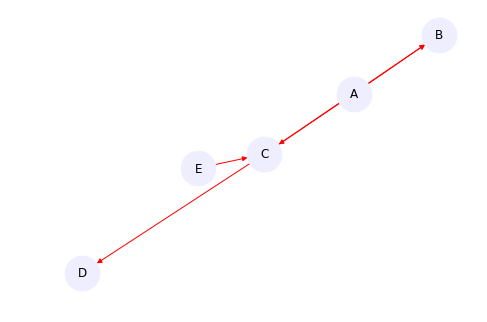

In [9]:
nx.draw_spring(graphB, with_labels=True, node_size=1200, node_color='#eeeeff', edge_color='red')

Find the adjacency matrix for your `graphB` as above.

**Exercise 3:**

Complete the function below to find the degree distrbution for any given graph. You can use the networkx method `graph.degree()`, which returns the number of edges connecting to each node. You should return a tuple of two lists: the first list contains all observed vertex degree values in the graph, and the second contains the counts showing how often a vertex with that degree was observed.

For instance, calling `degree_distribution` on `graphA` above could return

```([1, 2, 3], [1, 2, 1])```

meaning that there is one vertex with degree 1 (D), two vertices with degree 2 (A and B), and one vertex with degree 3 (C).

These two lists will give us a handy form for plotting the degree distribution.

In [10]:
# Here's the networkx function `graph.degree()`:
graphA.degree('C')

3

In [46]:
def degree_distribution(graph):
    """
    For the networkx graph provided, return a tuple of lists, where
    the first list gives all observed vertex degrees, and the second list gives
    the corresponding vertex counts.
    """
    degree_values = list(dict(graph.degree()).values())
    degree_counts = Counter(degree_values)
    return (degree_counts.keys(), degree_counts.values())

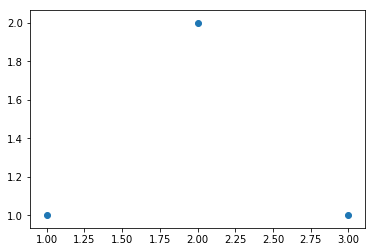

In [47]:
# Graph A:
degrees, counts = degree_distribution(graphA)
fig, ax = plt.subplots()
ax.scatter(degrees, counts)

Here are some graphs of types described in lectures. You can generate other graph types with networkx functions described at https://networkx.github.io/documentation/stable/reference/generators.html

A random (Erdos-Renyi) graph:

In [48]:
# 600 nodes, probability of each edge 0.4
random_graph = nx.fast_gnp_random_graph(600, 0.4)

A scale-free graph:

In [49]:
# 600 nodes
scale_free_graph = nx.scale_free_graph(600)

If you are finding the degree distribution correctly, you can plot the distributions for these different graph types:

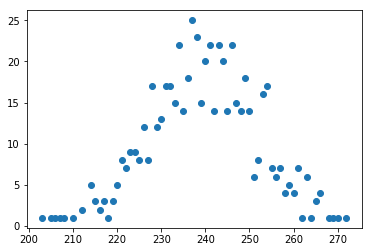

In [50]:
degrees, counts = degree_distribution(random_graph)
fig, ax = plt.subplots()
ax.scatter(degrees, counts)

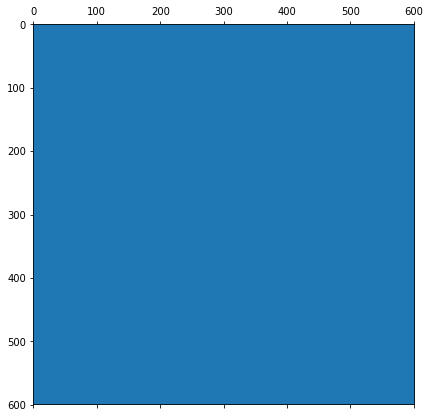

In [53]:
r_adj = nx.adj_matrix(random_graph)
plt.figure(figsize=(7, 7))
plt.spy(r_adj)

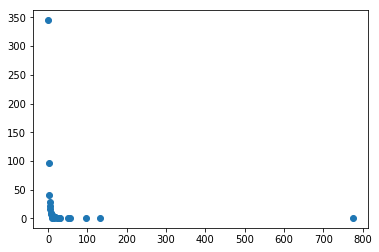

In [54]:
degrees, counts = degree_distribution(scale_free_graph)
fig, ax = plt.subplots()
ax.scatter(degrees, counts)

The plot for the scale-free graph doesn't look very clear as the relationship shown in lectures is on a log-log scale. Try using `ax.set_xscale('log')` and `ax.set_yscale('log')` on your plot to see this relationship more clearly.

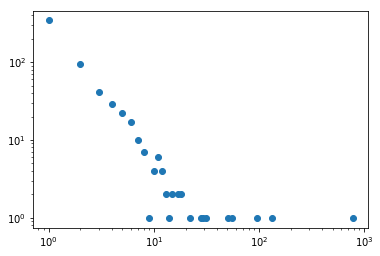

In [55]:
degrees, counts = degree_distribution(scale_free_graph)
fig, ax = plt.subplots()
ax.scatter(degrees, counts)
ax.set_xscale('log')
ax.set_yscale('log')

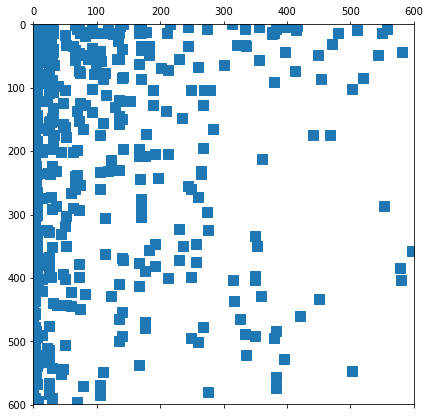

In [56]:
sf_adj = nx.adj_matrix(scale_free_graph)
plt.figure(figsize=(7, 7))
plt.spy(sf_adj)

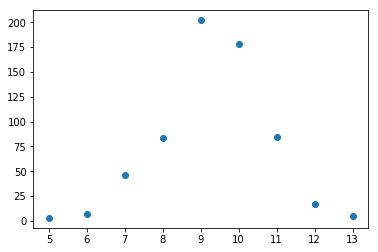

In [57]:
small_world = nx.navigable_small_world_graph(25)
degrees, counts = degree_distribution(small_world)
fig, ax = plt.subplots()
ax.scatter(degrees, counts)

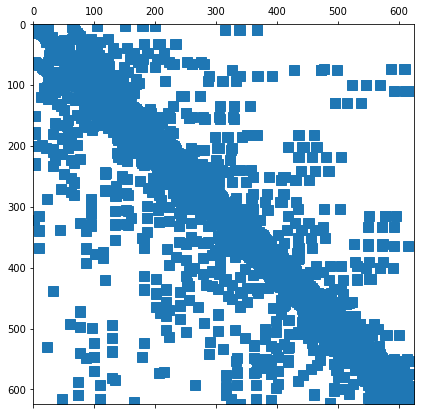

In [58]:
sm_adj = nx.adj_matrix(small_world)
plt.figure(figsize=(7, 7))
plt.spy(sm_adj)

**Exercise 4:**

Complete the function below to implement the clustering coefficient calculation described in lectures. This function does exist in networkx, but don't use it - implement it yourself. You can however use the `graph.neighbors()` method from networkx to find all the neighbours of a given node.

You can check that your answer gives the same result as the networkx function `nx.clustering()`.

In [61]:
def clustering_coefficient(graph, node_label):
    """
    Calculate and return the clustering coefficient for a node in an undirected graph.
    The clustering coefficient is the number of edges between neighbors 
    divided by the possible number of edges between neighbors.
    """
    neighbor_pairs = list(itertools.combinations(graph.neighbors(node_label), 2))
    #print(neighbor_pairs)
    connections = sum(e in graph.edges for e in neighbor_pairs)
    #print(connections)
    return connections / len(neighbor_pairs)

In [62]:
clustering_coefficient(graphA, 'C')

0.3333333333333333